In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('C:\\r_temp\\bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['job', 'marital', 'education']

df_en = pd.get_dummies(df, columns=categorical_cols)

#원-핫 인코딩 결과 확인
print(df_en.head())

   age default  balance housing loan  contact  day month  duration  campaign  \
0   59      no     2343     yes   no  unknown    5   may      1042         1   
1   56      no       45      no   no  unknown    5   may      1467         1   
2   41      no     1270     yes   no  unknown    5   may      1389         1   
3   55      no     2476     yes   no  unknown    5   may       579         1   
4   54      no      184      no   no  unknown    5   may       673         2   

   ...  job_technician  job_unemployed job_unknown marital_divorced  \
0  ...               0               0           0                0   
1  ...               0               0           0                0   
2  ...               1               0           0                0   
3  ...               0               0           0                0   
4  ...               0               0           0                0   

   marital_married  marital_single  education_primary  education_secondary  \
0             

In [4]:
numeric_cols = ['age', 'balance', 'duration']

# 수치형 변수 선택 및 스케일링
data_numeric = df[numeric_cols]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)

# 스케일링된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# 스케일링 결과 확인
print(scaled_df.head())

        age   balance  duration
0  1.491505  0.252525  1.930226
1  1.239676 -0.459974  3.154612
2 -0.019470 -0.080160  2.929901
3  1.155733  0.293762  0.596366
4  1.071790 -0.416876  0.867171


In [5]:
combined_df = pd.concat([df_en, scaled_df], axis=1)
combined_df.head()
# 'yes'와 'no'를 1과 0으로 변환
combined_df['default'] = combined_df['default'].map({'no': 0, 'yes': 1})
combined_df['housing'] = combined_df['housing'].map({'no': 0, 'yes': 1})
combined_df['loan'] = combined_df['loan'].map({'no': 0, 'yes': 1})

# 변환된 데이터 확인


print(combined_df.head())

   age  default  balance  housing  loan  contact  day month  duration  \
0   59        0     2343        1     0  unknown    5   may      1042   
1   56        0       45        0     0  unknown    5   may      1467   
2   41        0     1270        1     0  unknown    5   may      1389   
3   55        0     2476        1     0  unknown    5   may       579   
4   54        0      184        0     0  unknown    5   may       673   

   campaign  ...  marital_divorced  marital_married marital_single  \
0         1  ...                 0                1              0   
1         1  ...                 0                1              0   
2         1  ...                 0                1              0   
3         1  ...                 0                1              0   
4         2  ...                 0                1              0   

  education_primary  education_secondary  education_tertiary  \
0                 0                    1                   0   
1           

In [6]:
columns_to_drop = ['contact', 'day', 'month','poutcome','deposit']
df = combined_df.drop(columns=columns_to_drop)
df.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,job_admin.,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,age,balance,duration
0,59,0,2343,1,0,1042,1,-1,0,1,...,0,1,0,0,1,0,0,1.491505,0.252525,1.930226
1,56,0,45,0,0,1467,1,-1,0,1,...,0,1,0,0,1,0,0,1.239676,-0.459974,3.154612
2,41,0,1270,1,0,1389,1,-1,0,0,...,0,1,0,0,1,0,0,-0.019470,-0.080160,2.929901
3,55,0,2476,1,0,579,1,-1,0,0,...,0,1,0,0,1,0,0,1.155733,0.293762,0.596366
4,54,0,184,0,0,673,2,-1,0,1,...,0,1,0,0,0,1,0,1.071790,-0.416876,0.867171


In [7]:
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

In [13]:
# 특성 및 레이블 선택
X = df.drop('default', axis=1)  # 종속 변수를 제외한 나머지 특성을 선택
y = df['default']  # 종속 변수를 레이블로 선택

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#Decision Tree
# 의사결정 나무 모델 생성
decision_tree = DecisionTreeClassifier()
param_grid_dt = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search_dt = GridSearchCV(decision_tree, param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)
best_decision_tree = grid_search_dt.best_estimator_

print("Decision Tree - Best parameters:", grid_search_dt.best_params_)
print("최고 성능:", grid_search.best_score_)

# 최적의 모델로 예측하기
best_DT = grid_search_dt.best_estimator_
y_pred = best_DT.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("검증 데이터의 정확도:", accuracy)

Decision Tree - Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 성능: 0.9851047518671521
검증 데이터의 정확도: 0.9811912225705329


In [20]:
#Decision tree
from sklearn.model_selection import cross_val_score

# 5겹 교차검증 수행
scores_5fold = cross_val_score(best_decision_tree, X_train, y_train, cv=5)

# 각 폴드의 정확도 출력
print("5겹 교차검증 정확도:", scores_5fold)

# 평균 정확도 출력
print("평균 정확도 (5겹 교차검증):", scores_5fold.mean())

# 10겹 교차검증 수행
scores_10fold = cross_val_score(best_decision_tree, X_train, y_train, cv=10)

# 각 폴드의 정확도 출력
print("10겹 교차검증 정확도:", scores_10fold)

# 평균 정확도 출력
print("평균 정확도 (10겹 교차검증):", scores_10fold.mean())


5겹 교차검증 정확도: [0.98208287 0.98320269 0.98096305 0.98432251 0.98487395]
평균 정확도 (5겹 교차검증): 0.9830890116404906
10겹 교차검증 정확도: [0.98096305 0.98544233 0.98208287 0.98320269 0.98432251 0.98096305
 0.98320269 0.98432251 0.98432251 0.98430493]
평균 정확도 (10겹 교차검증): 0.9833129120865326


In [18]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
print("KNN - Best parameters:", grid_search_knn.best_params_)


print("최고 성능:", grid_search.best_score_)

# 최적의 모델로 예측하기
best_KNN = grid_search_knn.best_estimator_
y_pred = best_KNN.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("검증 데이터의 정확도:", accuracy)



KNN - Best parameters: {'n_neighbors': 7, 'weights': 'uniform'}
최고 성능: 0.9851047518671521
검증 데이터의 정확도: 0.9847738468428123


In [21]:
#knn

from sklearn.model_selection import cross_val_score

# 5겹 교차검증 수행
scores_5fold = cross_val_score(best_KNN, X_train, y_train, cv=5)

# 각 폴드의 정확도 출력
print("5겹 교차검증 정확도:", scores_5fold)

# 평균 정확도 출력
print("평균 정확도 (5겹 교차검증):", scores_5fold.mean())

# 10겹 교차검증 수행
scores_10fold = cross_val_score(best_KNN, X_train, y_train, cv=10)

# 각 폴드의 정확도 출력
print("10겹 교차검증 정확도:", scores_10fold)

# 평균 정확도 출력
print("평균 정확도 (10겹 교차검증):", scores_10fold.mean())

5겹 교차검증 정확도: [0.98488242 0.98488242 0.9837626  0.98432251 0.98543417]
평균 정확도 (5겹 교차검증): 0.9846568235356852
10겹 교차검증 정확도: [0.98432251 0.98544233 0.98544233 0.98544233 0.98544233 0.98320269
 0.98320269 0.98432251 0.98432251 0.98430493]
평균 정확도 (10겹 교차검증): 0.9845447149980668


In [22]:
pipe_svm = make_pipeline(StandardScaler(), SVC(random_state=1))

# 탐색할 매개변수 그리드 정의
r = [0.1, 1, 10]
pg_svm = [{'svc__C': r, 'svc__kernel': ['linear']},
          {'svc__C': r, 'svc__gamma': r, 'svc__kernel': ['rbf']}]

# GridSearchCV 객체 생성
gs_svm = GridSearchCV(estimator=pipe_svm,
                      param_grid=pg_svm,
                      scoring='accuracy',
                      cv=5)

# 교차검증 수행
gs_svm_scores = cross_val_score(gs_svm, X=X_train, y=y_train, cv=5, scoring='accuracy', n_jobs=-1)

# 최적의 매개변수로 모델 훈련
gs_svm.fit(X_train, y_train)
gs_svm_best = gs_svm.best_estimator_
gs_svm_best.fit(X_train, y_train)

print("최고 성능:", gs_svm.best_score_)

# 최적의 모델로 예측하기
best_svm = gs_svm.best_estimator_
y_pred = best_svm.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("검증 데이터의 정확도:", accuracy)

최고 성능: 0.9851047518671521
검증 데이터의 정확도: 0.9843260188087775


In [23]:
# 10겹 교차검증 수행
scores_10fold = cross_val_score(best_svm, X_train, y_train, cv=10)

# 각 폴드의 정확도 출력
print("10겹 교차검증 정확도:", scores_10fold)

# 평균 정확도 출력
print("평균 정확도 (10겹 교차검증):", scores_10fold.mean())

10겹 교차검증 정확도: [0.98544233 0.98544233 0.98544233 0.98544233 0.98544233 0.98544233
 0.98432251 0.98432251 0.98432251 0.98542601]
평균 정확도 (10겹 교차검증): 0.985104750952852


In [24]:

# RandomForestClassifier 모델 생성
RF_object = RandomForestClassifier()

# 탐색할 매개변수 그리드 정의
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(RF_object, param_grid=param_grid, cv=5)

# 그리드 탐색 및 교차검증 수행
grid_search.fit(X_train, y_train)

# 최적의 매개변수와 그에 따른 최고 성능 출력
print("grid_search.best_params:", grid_search.best_params_)
print("최고 성능:", grid_search.best_score_)

# 최적의 모델로 예측하기
best_RF = grid_search.best_estimator_
y_pred = best_RF.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("검증 데이터의 정확도:", accuracy)


grid_search.best_params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
최고 성능: 0.9851047518671521
검증 데이터의 정확도: 0.9838781907747425


In [25]:
# 10겹 교차검증 수행
scores_10fold = cross_val_score(best_RF, X_train, y_train, cv=10)

# 각 폴드의 정확도 출력
print("10겹 교차검증 정확도:", scores_10fold)

# 평균 정확도 출력
print("평균 정확도 (10겹 교차검증):", scores_10fold.mean())

10겹 교차검증 정확도: [0.98544233 0.98544233 0.98544233 0.98544233 0.98544233 0.98544233
 0.98432251 0.98320269 0.98320269 0.98542601]
평균 정확도 (10겹 교차검증): 0.9848807867871185


In [27]:
from sklearn.metrics import confusion_matrix

# Decision Tree 모델의 예측 결과
y_pred_dt = best_DT.predict(X_test)

# Random Forest 모델의 예측 결과
y_pred_rf = best_RF.predict(X_test)

# SVM 모델의 예측 결과
y_pred_svm = best_svm.predict(X_test)

# KNN 모델의 예측 결과
y_pred_knn = best_KNN.predict(X_test)

# Decision Tree 모델의 혼동행렬
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree 모델의 혼동행렬:")
print(cm_dt)

# Random Forest 모델의 혼동행렬
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest 모델의 혼동행렬:")
print(cm_rf)

# SVM 모델의 혼동행렬
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM 모델의 혼동행렬:")
print(cm_svm)

# KNN 모델의 혼동행렬
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN 모델의 혼동행렬:")
print(cm_knn)


Decision Tree 모델의 혼동행렬:
[[2190    8]
 [  34    1]]
Random Forest 모델의 혼동행렬:
[[2197    1]
 [  35    0]]
SVM 모델의 혼동행렬:
[[2198    0]
 [  35    0]]
KNN 모델의 혼동행렬:
[[2198    0]
 [  34    1]]


In [28]:
# 혼동행렬 결과
# svm모델의 정확도가 가장 높아 우수해보임

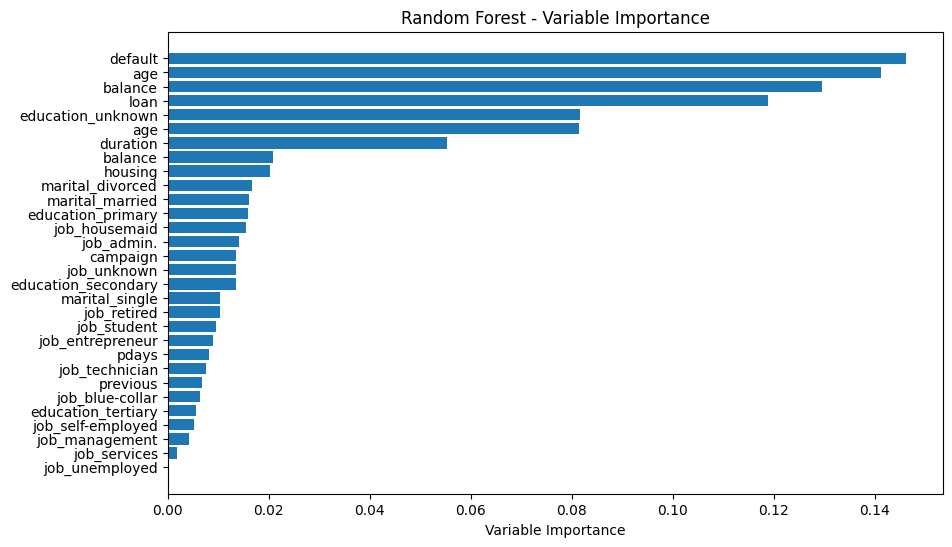

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# 랜덤 포레스트 모델의 변수 중요도 계산
importance = best_RF.feature_importances_
feature_names=df.columns.tolist()

# 변수 중요도 시각화
fig, ax = plt.subplots(figsize=(10, 6))
sorted_idx = np.argsort(importance)  # 변수 중요도를 오름차순으로 정렬
ax.barh(range(len(importance)), importance[sorted_idx], align='center')
ax.set_yticks(range(len(importance)))
ax.set_yticklabels(np.array(feature_names)[sorted_idx])
ax.set_xlabel('Variable Importance')
ax.set_title('Random Forest - Variable Importance')
plt.show()


In [31]:
# default변수는 종속변수이기 때문에 해석에서 제외하겠다.
# age와 balance, loan, education_unknown 변수가 중요한 변수로 활용되었다.